<a href="https://colab.research.google.com/github/JovanaK99/PPPO_Karamarkovi-_Jovana_IT63-2018/blob/main/PPPO_Karamarkovi%C4%87_Jovana_IT63_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDMET**: Principi prezentacije i prepoznavanja oblika

**TEMA**: Detekcija/Klasifikacija 

**STUDENT**: Karamarković Jovana IT63-2018

Tema projektnog zadatka je detekcija i klasifikacija oštećenja koja se nalaze na površini čelika. Pri izradi zadatka potrebno je predvideti lokaciju i vrstu nedostatka, kako bi te informacije na neki način doprinele povećanju efikasnosti prilikom proizvodnje čelika. 
 Za realizaciju zadatka koristi se dataset koji se nalazi na sledećoj lokaciji:
https://drive.google.com/file/d/1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS/view?usp=sharing.

Dobijeni dataset se sastoji od:
*   **train_images foldera** - obuhvata slike koje se koriste za treniranje modela. U ovom folderu se nalazi 12568 slika.
*   **test_images foldera** - obuhvata slike za testiranje modela. Osnovni cilj je detektovati defekte na tim slikama i klasifikovati ih u određene klase. U ovom folderu se nalazi 5506 slika.
*   **train.csv** - fajl koji sadrži napomene za obuku. Ima tri kolone: ImageId, ClassId i EncodedPixels. ClassId obuhvata interval [1, 2, 3, 4] i svaka slika predstavljena pomoću svog id-ja pripada nekoj od klasa iz ovog intervala.
*   **sample_submission.csv** - primer kako treba da izgleda format fajla kao rešenje zadatka.




Prvi korak pri realizaciji zadatka je učitavanje seta podataka koji nam je potreban za rad algoritma. Set podataka se nalazi u deljenom folderu. 

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS" -O images.zip && rm -rf /tmp/cookies.txt

--2022-12-11 20:20:53--  https://docs.google.com/uc?export=download&confirm=t&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS
Resolving docs.google.com (docs.google.com)... 172.253.115.101, 172.253.115.100, 172.253.115.102, ...
Connecting to docs.google.com (docs.google.com)|172.253.115.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ag97ukmv9cll490m85j7oedsrumseqr5/1670790000000/06049624160957438625/*/1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS?e=download&uuid=c95969ad-7c6f-4373-a1d4-272483403265 [following]
--2022-12-11 20:20:53--  https://doc-0g-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ag97ukmv9cll490m85j7oedsrumseqr5/1670790000000/06049624160957438625/*/1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS?e=download&uuid=c95969ad-7c6f-4373-a1d4-272483403265
Resolving doc-0g-64-docs.googleusercontent.com (doc-0g-64-docs.googleusercontent.com)... 142.251.163.

Kako se fotografije koje su nam potrebne nalaze u zipovanom folderu koji je podignut na Google Drive, moramo izvršiti unzip.

In [ ]:
!unzip images.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_images/99f75320d.jpg  
  inflating: train_images/99f9d2375.jpg  
  inflating: train_images/99fd3c6f5.jpg  
  inflating: train_images/9a016fe15.jpg  
  inflating: train_images/9a064450d.jpg  
  inflating: train_images/9a08c2783.jpg  
  inflating: train_images/9a18e4457.jpg  
  inflating: train_images/9a1f7c238.jpg  
  inflating: train_images/9a2523ce9.jpg  
  inflating: train_images/9a3e774ff.jpg  
  inflating: train_images/9a5e9e77c.jpg  
  inflating: train_images/9a5f7a855.jpg  
  inflating: train_images/9a62177bb.jpg  
  inflating: train_images/9a67575cf.jpg  
  inflating: train_images/9a6ac5406.jpg  
  inflating: train_images/9a70057c0.jpg  
  inflating: train_images/9a72fd89e.jpg  
  inflating: train_images/9a75974ba.jpg  
  inflating: train_images/9a762b892.jpg  
  inflating: train_images/9a7b2f3af.jpg  
  inflating: train_images/9a7b427b4.jpg  
  inflating: train_images/9a81a8056.jpg  
  inflating: train_images

U narednoj liniji koda uz pomoć biblioteke matplotlib učitavane su pojedinačne fotografije kako bi na taj način bolje razumeli fotografiju, jer su nam i dalje nepoznate. Analizom fotografija uz pomoc interneta, utvrđeno je da se na fotografijama nalaze površine čelika i njegova oštećenja. 

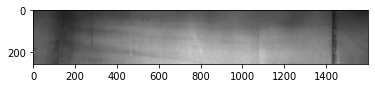

In [ ]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
image =(imread('train_images/0b5c97e4c.jpg'))
plt.imshow(image)
plt.show()

Naredna linija koda je preuzeta sa interneta i služi potrebi da se prikaže na koji način treba da funkcioniše algoritam koji se kreira projektom. Prikazene su identične fotografije, prva originalna fotografija potom istina (ono što je stvarno na slici, odnosno primećena oštećenja) i zatim on što je algoritam predvideo.

In [ ]:
%%html
<div style = "max-width:900px" align="center">
<iframe src="https://rexvaz.com/files/steel_defects/slides.html" width="100%" height="320" 
frameBorder="0"></iframe>
</div>

Za realizaciju projekta potrebne su biblioteke koje su importovane u narednoj liniji koda. 

In [ ]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import keras
from PIL import Image
from pathlib import Path
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.models import Sequential, Model, load_model
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.optimizers import adam_v2, sgd_experimental, rmsprop_v2
from keras.callbacks import Callback, EarlyStopping
from keras.utils import tf_utils
from sklearn.metrics import confusion_matrix
from keras import backend as K
import tensorflow as tf
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

U mašinskom učenju koristimo skup uzoraka za treniranje pri čemu je cilj otkrivanje strukture podataka. Kako bi algoritam mogao da radi potrebno ga je istrenirati.

Postoje razni formati za tabelarno predstavljanje podataka, a najjednostavniji od njih se zove CSV. Iz tog razloga bilo je potrebno učitati csv fajl u okviru kog se nalaze nazivi fotografija, klase kojoj pripadaju i enkodovane vrednosti pixela fotografija.

In [ ]:

data = pd.read_csv("/content/train.csv")

U sledećim koracima sledi upoznavanje sa podacima

Podaci su prikazani pomoću bar plota. Dijagram prikazuje broj elemenata u svakoj klasi.

3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64

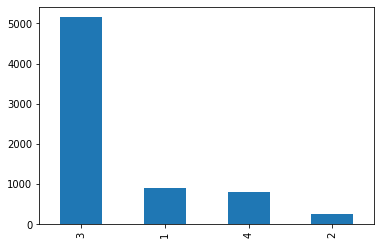

In [ ]:
data["ClassId"].value_counts().plot(kind = 'bar')
data["ClassId"].value_counts()

Svaka slika ima svoj jedinstveni identifikator, klasu kojoj pripada i enkriptovanu vrednost u piskelima. 

In [ ]:
data

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


Oblik niza je br. elemenata u svakoj dimenziji. U NumPy-u se koristi funkcija pod nazivom shape koja vraća torke tj. br elemenata.

In [ ]:
data.shape

(7095, 3)

In [ ]:
data.info

<bound method DataFrame.info of             ImageId  ClassId  \
0     0002cc93b.jpg        1   
1     0007a71bf.jpg        3   
2     000a4bcdd.jpg        1   
3     000f6bf48.jpg        4   
4     0014fce06.jpg        3   
...             ...      ...   
7090  ffcf72ecf.jpg        3   
7091  fff02e9c5.jpg        3   
7092  fffe98443.jpg        3   
7093  ffff4eaa8.jpg        3   
7094  ffffd67df.jpg        3   

                                          EncodedPixels  
0     29102 12 29346 24 29602 24 29858 24 30114 24 3...  
1     18661 28 18863 82 19091 110 19347 110 19603 11...  
2     37607 3 37858 8 38108 14 38359 20 38610 25 388...  
3     131973 1 132228 4 132483 6 132738 8 132993 11 ...  
4     229501 11 229741 33 229981 55 230221 77 230468...  
...                                                 ...  
7090  121911 34 122167 101 122422 169 122678 203 122...  
7091  207523 3 207777 9 208030 15 208283 22 208537 2...  
7092  105929 5 106177 14 106424 24 106672 33 106923 ...  
709

**Augmentacija podataka** 

Augmentacija fotografija predstavlja procedura u okviru koje se skup podataka ciljano proširuje primenom različitih transformacija koje se sprovode nad slikama. Svrha augmentacije je dvostruka, s jedne strane poboljšava preciznost i tačnost modela, a s druge će omogućiti generalizovanje modela. Primenom raznih transformacija moguće je konstruisati slike koje se dosta razlikuju od onih koje se nalaze u skupu podataka, ali se očekuje da model može ispravno da ih klasifikuje.

**tqdm** je biblioteka koja omogućava prikaz progresa realizacije prolaska kroz podatke (niz). cv2 modul koji omogućava razne vrste funkcija koje se odnose na kompjutersku viziju. Prolaskom kroz slike iz seta podataka (data), iščitava se slika i smešta u promenljivu image koja se formatira (u smislu menja se njena visina i širina), potom se slika dodaje u niz l1, a njena klasa u niz l2. Postupak se ponavlja svakim prolazom kroz niz, a na kraju imamo dva niza l1 u kom su sve fotografije i l2 u kom su klase forografija iz niza l1, u odgovarajućem redosledu.

In [ ]:
l1=[]
l2=[]
for img,ClassId,EncodedPixels in tqdm(data.values):
  image=cv2.imread("/content/train_images/{}".format(img), cv2.IMREAD_COLOR)
  image=cv2.resize(image, (150,150))
  l1.append(image)
  l2.append(ClassId)

100%|██████████| 7095/7095 [01:03<00:00, 111.11it/s]


U Narednmm linijama koda se učitavaju fotografije iz niza l1 koje se nalaze na poziciji sa indexom 1,150 i 75 u ovom slučaju.

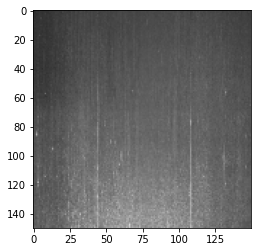

In [ ]:
i = 1
plt.imshow(l1[i])

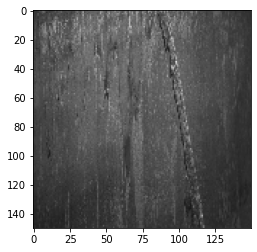

In [ ]:
i = 150
plt.imshow(l1[i])

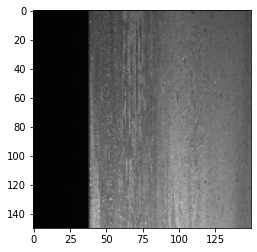

In [ ]:
i = 75
plt.imshow(l1[i])

**Normalizacija**

Normalizacija je proces reskaliranja svih vrednosti u opseg od 0 do 1. Na taj način sve vrednosti jednako utiču na računanje distance između instanci, što je pogodno za klasifikacionu upotrebu.



Potrebno je piksele prevesti u numerički zapis, kako bi na taj način algoritam mogao jednostavnije da ih obrađuje i koristi za donošenje odluke. Neophodno je prevesti tekst razumljiv čoveku u jezik koji je razumljiv mašini. Baš iz tog razloga neophodno je koristiti encoder. Label Endcoder može se koristi za normalizaciju podataka, koji input pretvara u klasu označenu brojevima od 0 do n-1, gde je n broj elemenata input-a. Korišćena je metoda fit_transform koja prima vrednosti kao parametre a vraća enkodirane vrednosti.

In [ ]:
encoder = LabelEncoder()

X=np.array(l1)
X=X/255

y=encoder.fit_transform(l2)
y=to_categorical(y)

**Treniranje modela**

Prvi korak pri treniranju modela je podela seta podataka na trening i test podatke. Trening podaci se koriste da algoritam iz njih uči kako bi kasnije nad test podacima mogao da izvrši postupak detekcije oštećenja i klasifikacije fotografija u odgovarajuću klasu. Set podatak je podeljen u odnosu 80:20, 80% seta podataka se koristi za treniranje modela, a 20% se koristi za testiranje modela.

Hiper parametri: X i y su nizovi koji se koriste za podelu, *test_size* ukazuje u kom opsegu se vrši podela seta podataka, *stratify* deli set podataka u stilu stratifikacije(u zavisnosti od labela set podataka), *shuffle* je parametar kojim se ukazuje da li će se set podataka promešati pre nego se izvrši podela, *random_state* je parametar koji kontroliše mešanje podataka pre primene podele

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True,random_state=32)

In [ ]:
print("X trening: ",X_train.shape)
print("X test: ",X_test.shape)
print("y trening: ",y_train.shape)
print("y test: ",y_test.shape)

X trening:  (5676, 150, 150, 3)
X test:  (1419, 150, 150, 3)
y trening:  (5676, 4)
y test:  (1419, 4)


**Kreiranje CNN modela**

Konvolucijske neuronske mreže (eng. Convolutional neural networks ili CNN) predstavljaju specijalizovani tip neuronskih mreža za procesiranje podataka koji se mogu svrstati u kategoriju mrežaste topologije (eng. grid-like topology). CNN predstavlja određeni tip duboke NN arhitekture koja je posebno dobro prilagođena skupovima podataka slika. CNN se sada koristi u računarskom vidu za postizanje vrhunskih rezultata za različite zadatke prepoznavanja slika.

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))
     

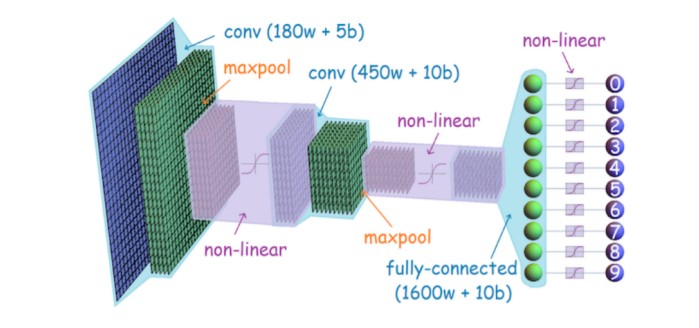

Konvolutivna mreza se sastoji od konvolutivnih slojeva, slojeva agregacije i standardne potpuno povezane neuronske mreze. Uloga slojeva konvolucije je da vrše operacije konvolucije i tako konstruišu atribute. Ako je na ulazu slika, izlaz iz sloja konvolucije ce biti neka nova slika. Uloga slojeva agregacije je da agregiraju informaciju dobijenu iz konvolutivnog sloja (npr. da svedu sliku na manju rezoluciju uprosecavanjem, maksimumom ili slično)

Na kraju dolazimo do finalnih slika male dimenzije. Svaka slika je jedna matrica. Tada se tipično sve vrednosti koje se nalaze u ovim matricama poredaju u jedan vektor i taj vektor se koristi kao ulaz u potpuno povezanu mrežu.

Narednom linijom koda se prikazuju detalji izgrađenog modela.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 256)               3

Narednom ćelijom ćemo zaustaviti treniranje modela kada metrike prestanu da ostvaruju bolje rezultate. Za to se koristi klasa EarlyStopping.Argumenti: *patience* - broj epoha nakon koje se prekida trening ukoliko u okviru svake od epoha metrike ne pokažu bolje rezultate; *min_delta* - minimalna promena praćene metrike koja će se smatrati poboljšanjem; *restore_best_weights* - da li vratiti najbolje rezultate iz prethodne epohe u trenutnu epohu.

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True,)

**Kompajlovanje modela**

Kompajliranje/konfigurisanje modela pre treninga se postiže metodom *compile*, argumenti metode su: *loss* - funkcija gubitka, njena svrha je da izračuna količinu metrike koju model treba da minimizira. U ovom slučaju funkcija koja se koristi omogućava izračunavanje unakrsne entropije između oznaka i prediktora; *optimizer* - optimizator klase. Adam klasa je optimizator koji minimizira grešku i implementira Adamov algoritam. Adamov optimizator je metoda stohastičkog gradijentalnog spusta koja se zasniva na adaptivnoj proceni momenta prvog i drugog reda. *metrics* - lista metrika koje će model da evaluira tokom treninga i testa, u ovom slučaju prati se tačnost (*accuracy*).

In [ ]:
from sklearn import metrics
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

Sledeći korak je treniranje modela za zadati broj epoha.Postupak se vrši primenom metode *fit* na kreirani model. Argumenti metode: *X_train* - ulazni niz podataka; *y_train* - ciljane vrednosti; *epochs* - broj epoha(iteracija nad setom podataka); *validation_data* - podaci na osnovu kojih treba proceniti gubitak i sve metrike modela na kraju svake epohe;*batch_size* - broj uzoraka pri svakom pojedinačnom spustu; *verbose* - režim opširnosti; *callbacks* - lista callback instanci koje se izvršavaju tokom treninga

In [ ]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1, callbacks=[early_stopping])

Epoch 1/20
45/45 [==============================] - 120s 3s/step - loss: 0.7957 - accuracy: 0.7297 - val_loss: 0.7137 - val_accuracy: 0.7477
Epoch 2/20
45/45 [==============================] - 118s 3s/step - loss: 0.6706 - accuracy: 0.7445 - val_loss: 0.6588 - val_accuracy: 0.7442
Epoch 3/20
45/45 [==============================] - 114s 3s/step - loss: 0.6104 - accuracy: 0.7556 - val_loss: 0.6186 - val_accuracy: 0.7660
Epoch 4/20
45/45 [==============================] - 111s 2s/step - loss: 0.5688 - accuracy: 0.7694 - val_loss: 0.6269 - val_accuracy: 0.7505
Epoch 5/20
45/45 [==============================] - 108s 2s/step - loss: 0.5382 - accuracy: 0.7731 - val_loss: 0.6171 - val_accuracy: 0.7541
Epoch 6/20
45/45 [==============================] - 114s 3s/step - loss: 0.4983 - accuracy: 0.7875 - val_loss: 0.6114 - val_accuracy: 0.7639
Epoch 7/20
45/45 [==============================] - 109s 2s/step - loss: 0.4707 - accuracy: 0.8006 - val_loss: 0.5848 - val_accuracy: 0.7590
Epoch 8/20
45

Nakon što je izvršeno kompajliranje i prolazak kroz set podataka u n epoha, rezultati treninga se smeštaju u data frame i rezultati se prikazuju putem grafova.

Sledeci graf se odnosi na funkciju gubitka.

***loss*** je vrednost funkcije za trening podatke

***val_loss*** je vrednost funkcije za model podatke

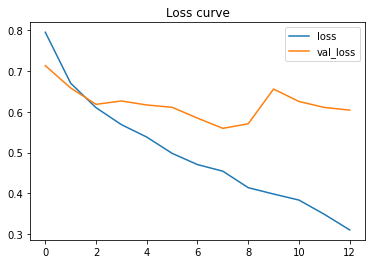

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

Drugi grafik se odnosi na tačnost kao metrika koja je praćena tokom treninga.

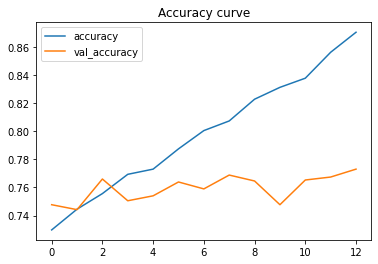

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

Prikaz rezultata koji su postignuti nad setom podataka sa korišćenjem kreiranog modela. Poziva se metoda *evaluate* kojoj se prosleđuju test setovi obeležja i ciljanih vrednosti. Metoda vraća rezultate gubitka i tačnosti koji su dobijeni primenom modela na set podataka. Ovim modelom dobijena je tačnost predviđanja klase slika 76.89%.

In [ ]:
result = model.evaluate(X_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

45/45 [==============================] - 8s 171ms/step - loss: 0.5597 - accuracy: 0.7689
[+] Accuracy: 76.89%


**Detekcija oštećenja**

Detekciji oštećenja podrazumeva klasifikovanje fotografija u odnosu na detektovana oštećenja. U narednoj liniji koda u promenljivu df smešten je train.csv fajl i prikazan sadržaj df promenljive. 

In [ ]:
df = pd.read_csv('/content/train.csv')
print('Dataframe shape: ', df.shape)
df.head()
     

Dataframe shape:  (7095, 3)


,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


U narednoj liniji je izvršena podela data frame-a po vrednosti ImageId.

In [ ]:
df['ImageId'] = df['ImageId'].apply(lambda x: x.strip())
df.ImageId.describe()

count              7095
unique             6666
top       ef24da2ba.jpg
freq                  3
Name: ImageId, dtype: object

In [ ]:
train_img_set = set(list(os.listdir('train_images')))
print('Ukupan broj fotografija u train_images folderu: ', len(train_img_set))
defect_img_set = set(df['ImageId'].values)
print('Ukupan broj fotografija uključenih u fajl train.csv: ', len(defect_img_set))
if (defect_img_set.issubset(train_img_set)):
    print('Svi ImageId koji se nalaze u train.csv su takođe u train_images folderu.')

Ukupan broj fotografija u train_images folderu:  12568
Ukupan broj fotografija uključenih u fajl train.csv:  6666
Svi ImageId koji se nalaze u train.csv su takođe u train_images folderu.


Na sledećem grafiku prikazane su procentualne vrednosti slika po klasama uz pomoc pita dijagrama

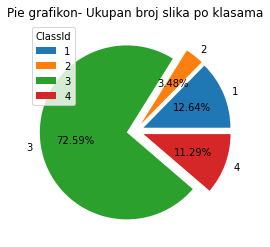

,ClassId,Count,count-percentage
0,1,897,12.642706
1,2,247,3.481325
2,3,5150,72.586328
3,4,801,11.289641


In [ ]:
ClassId_cnt_df = pd.DataFrame(df['ClassId'].value_counts().sort_index()).rename(columns = {'ClassId':'Count'})
ClassId_cnt_df['count-percentage'] = ClassId_cnt_df*100/ClassId_cnt_df.sum()

plt.pie(ClassId_cnt_df['Count'], labels = ClassId_cnt_df['Count'].index, explode = [0.1]*4, startangle = 0, autopct='%1.2f%%')
plt.legend(title = "ClassId")
plt.title('Pie grafikon- Ukupan broj slika po klasama')
plt.show()

ClassId_cnt_df.reset_index().rename(columns = {'index':'ClassId'})

Na sledećem grafiku je procentualno prikazan broj slika koje su oštećene i koje nisu oštećene

Broj ImageId-ijeva koji nisu oštećeni:  5902


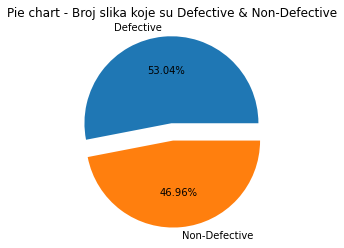

In [ ]:
print('Broj ImageId-ijeva koji nisu oštećeni: ', len(train_img_set) - len(defect_img_set))
non_defect_img_set = train_img_set - defect_img_set

plt.pie([len(defect_img_set), len(non_defect_img_set)], labels = ['Defective', 'Non-Defective'], explode = [0.1]*2, startangle = 0, autopct='%1.2f%%')
plt.title('Pie chart - Broj slika koje su Defective & Non-Defective')
plt.show()

In [ ]:
df['ClassId'].astype('str').describe()

count     7095
unique       4
top          3
freq      5150
Name: ClassId, dtype: object

In [ ]:
nos_labels_per_img_df = df.groupby('ImageId')['ClassId'].count()#reset_index()#.rename(columns = {'ClassId':'Count'})

nos_labels_per_img_df.head(10)

ImageId
0002cc93b.jpg    1
0007a71bf.jpg    1
000a4bcdd.jpg    1
000f6bf48.jpg    1
0014fce06.jpg    1
0025bde0c.jpg    2
002af848d.jpg    1
002fc4e19.jpg    2
0030401a5.jpg    1
0046839bd.jpg    1
Name: ClassId, dtype: int64

Prva sledeća linija koda odnosi se na broj uočenih oštećanja po slikama. Druga sledeća linija govori o tome kog su formata fotografije koje se nalaze u fajlu train_images koji je korišćen u projektu.

In [ ]:
data = nos_labels_per_img_df.value_counts().sort_index()
for index, value in data.items():
    print("Number of images with {} number of defect labels: {}".format(index, value))

Number of images with 1 number of defect labels: 6239
Number of images with 2 number of defect labels: 425
Number of images with 3 number of defect labels: 2


In [ ]:
img_shapes = set()
for img in list(os.listdir('train_images')):
    img_shapes.add(cv2.imread('train_images/'+img).shape)
img_shapes

{(256, 1600, 3)}

Definisanje metode koja na osnovu prosleđene fotografije generiše odgovarajuću masku koja prikazuje pozicuju prepoznatih oštećenja.

In [ ]:
def rle2mask(mask_rle, shape=(1600,256)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (width,height) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

Prolazi se kroz čitav set podataka i za svaku pojedinačnu sliku generiše se njena maska pozivom prethodno definisane metode. Kao rezultat dobijaju se side-by-side stvarne fotografije i njihove maske, u rezultatu se prikazuju samo po pet fotografija iz svake klase.

In [ ]:
import random

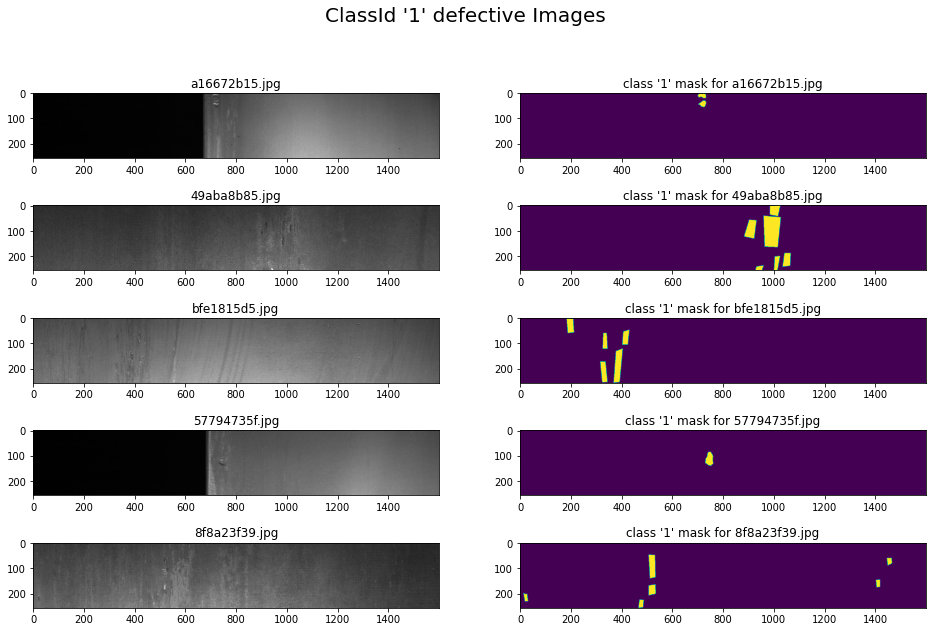

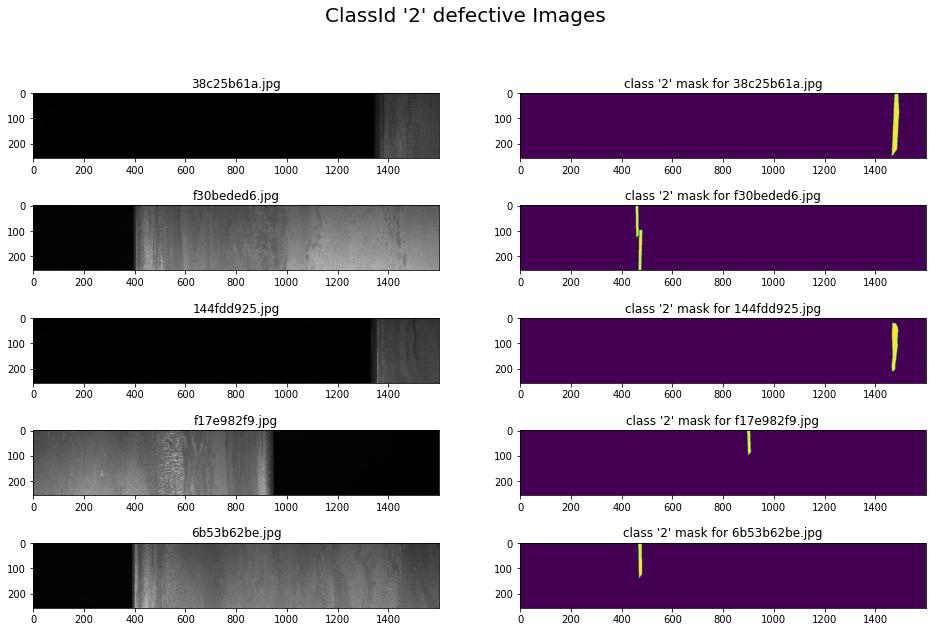

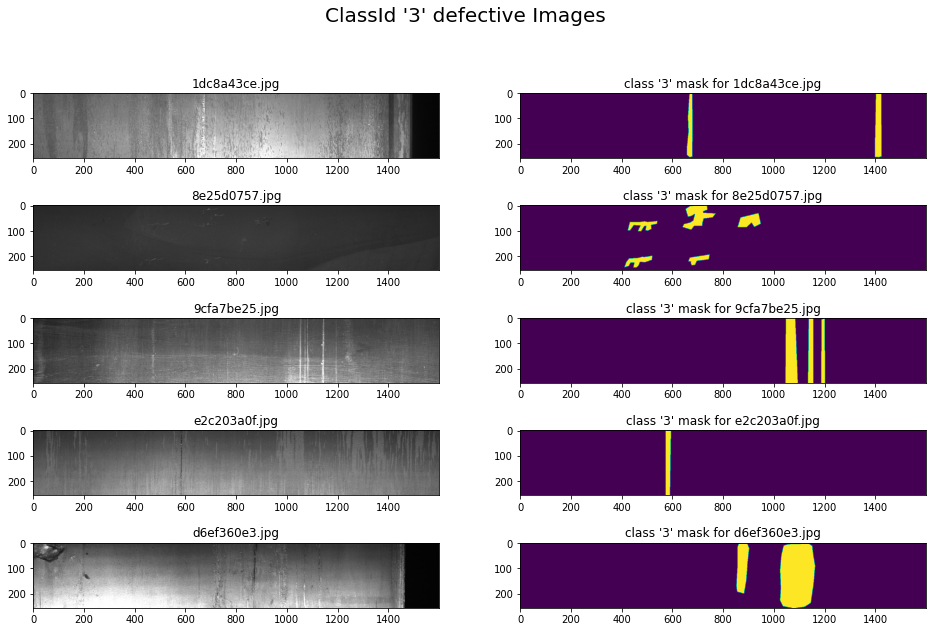

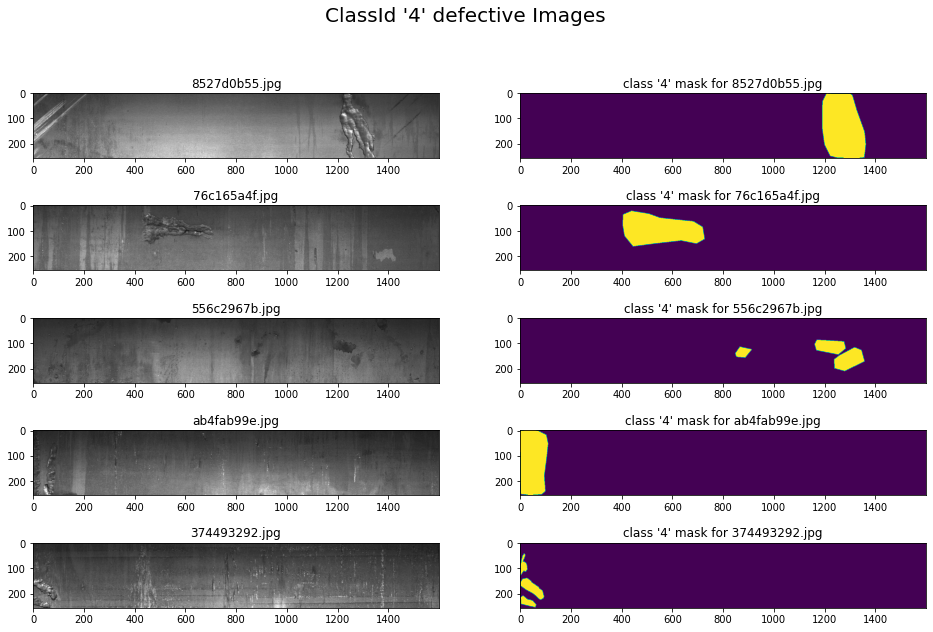

In [ ]:
for ClassId in [1,2,3,4]:
    class_df = df[df['ClassId'] == ClassId]
    fig, axs = plt.subplots(5, 2, figsize=(16,10))
    fig.suptitle("ClassId '{}' defective Images".format(ClassId), fontsize=20)
    x,y = 0,0
    for i, img_id in enumerate(random.sample(set(class_df['ImageId'].values), 5)):
        img_obj = cv2.imread('train_images/'+ img_id)
        axs[i,0].imshow(img_obj)
        axs[i,0].set_title(img_id)
        rle = class_df[class_df['ImageId'] == img_id]['EncodedPixels'].iloc[0]
        mask = rle2mask(rle)
        axs[i,1].imshow(mask)
        axs[i,1].set_title("class '{}' mask for ".format(ClassId) + img_id)
    plt.show()
    print('='*100)

**Zaključak**

Projekat je zamišljen na takav način da se primenom CNN vrste neuronske mreže izvrši kreiranje modela algoritma mašinskog učenja koji će biti u stanju da na ispravan način detektuje oštećenja i klasifikuje fotografije u odgovarajuće klase.

Nakon 13 prolaska (epohe) kroz set fotografija, uočeno je da model prestaje da daje bolje rezultate za vrednosti gubitka zato je i prekinut trening nakon njega. Postignuta tačnost je 76.89%, zbog same teme odlučeno je da se prati tačnost, jeste da je recall bolji u nekim kontekstima poput medicine, ali ovde je sasvim korektan accuracy.

Verujem da algoritam može dodatno da se unapredi dodavanjem slojeva neuronske mreže, primenom drugih vrsta modela ili igranjem sa hiperparametrima.

**Literatura**



1. Vežbe 9, 10.
2. Neuronske mreže i duboko učenje [CNN](http://ml.matf.bg.ac.rs/readings/slajdovi/10_NeuronskeMreze.pdf)
3. CNN slojevi [CNN slojevi](https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/)
4. Mašinsko učenje [Trening podata](http://ai.fon.bg.ac.rs/wp-content/uploads/2016/10/ML_intro_2016.pdf)
5. scikit-learn: machine learning in python, scikit-learn 









